# Pandas Deep Dive by Dmitry Zarubin
The purpose of this introduction is to give an idea about the some tricks and methods of Pandas library.

## Creating DataFrames

In [178]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris

Let's load a toy dataset

In [179]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [180]:
print(type(iris.data)) # the source can be numpy array

<class 'numpy.ndarray'>


In [181]:
my_dict = {'a':1,'b':2}
df = pd.DataFrame.from_dict(data=my_dict, orient = 'index',columns =['value']) # or a dictionary
df

,value
a,1
b,2


In [182]:
my_list = [['a','b',55]]*4
df = pd.DataFrame(data=my_list, columns =['value1','value2','value3']) # or a list
df

,value1,value2,value3
0,a,b,55
1,a,b,55
2,a,b,55
3,a,b,55


## Map and Apply

We strongly recommend to avoid using iterators over rows and rather employ MAP and APPLY methods. Map works only for a single column (pd.Series), whereas APPLY can be used for the whole dataframe, e.g. when you want change a value in one column based on a value from another column.

In [183]:
iris_df['sepal length (cm)'] = iris_df['sepal length (cm)'].map(lambda x: 2*x)
iris_df['sepal width (cm)'] = iris_df['sepal width (cm)'].map(lambda x: str(x)+' cm' )
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,10.2,3.5 cm,1.4,0.2
1,9.8,3.0 cm,1.4,0.2
2,9.4,3.2 cm,1.3,0.2
3,9.2,3.1 cm,1.5,0.2
4,10.0,3.6 cm,1.4,0.2


In [184]:
iris_df['condition'] = iris_df.apply( lambda row: row['petal length (cm)'] 
                                               if row['sepal length (cm)']>9.4 else np.nan,axis =1) 
#axis =1 apply function to each row
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),condition
0,10.2,3.5 cm,1.4,0.2,1.4
1,9.8,3.0 cm,1.4,0.2,1.4
2,9.4,3.2 cm,1.3,0.2,NaN
3,9.2,3.1 cm,1.5,0.2,NaN
4,10.0,3.6 cm,1.4,0.2,1.4


There are other useful methods e.g. fillna, replace, min, max etc. which can be used both for Series and DataFrame objects

## Merge and Append

In [185]:
# Merge two DF
iris_target = pd.DataFrame(data = iris.target, columns=['class'])
iris_target['class'] = iris_target['class'].map(lambda x: iris.target_names[x])
print(iris_target.head())
iris_merged = iris_df.merge(iris_target,how = 'inner',right_index= True, left_index=True)
iris_merged

    class
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),condition,class
0,10.2,3.5 cm,1.4,0.2,1.4,setosa
1,9.8,3.0 cm,1.4,0.2,1.4,setosa
2,9.4,3.2 cm,1.3,0.2,NaN,setosa
3,9.2,3.1 cm,1.5,0.2,NaN,setosa
4,10.0,3.6 cm,1.4,0.2,1.4,setosa
5,10.8,3.9 cm,1.7,0.4,1.7,setosa
6,9.2,3.4 cm,1.4,0.3,NaN,setosa
7,10.0,3.4 cm,1.5,0.2,1.5,setosa
8,8.8,2.9 cm,1.4,0.2,NaN,setosa
9,9.8,3.1 cm,1.5,0.1,1.5,setosa


APPEND basically is adding one dataframe on top of another while aligning the columns with identical names. In order to append to an empty DF (e.g. in a loop) one has to initialize it with result=pd.DataFrame([])

In [186]:
my_list1 = [['a','b',55]]*4
my_list2 = [['a','b','C',55]]*3
df1 = pd.DataFrame(data=my_list1, columns =['value1','value2','value5'])
df2 = pd.DataFrame(data=my_list2, columns =['value1','value2','value3','value4'])
df1 = df1.append(df2,sort=False)
df1
# one could also use df1.append(df2,ignore_index=True) to create a unique index

,value1,value2,value5,value3,value4
0,a,b,55.0,NaN,NaN
1,a,b,55.0,NaN,NaN
2,a,b,55.0,NaN,NaN
3,a,b,55.0,NaN,NaN
0,a,b,NaN,C,55.0
1,a,b,NaN,C,55.0
2,a,b,NaN,C,55.0


## GroupBy

In [187]:
print(iris_merged.groupby(['class'])['sepal length (cm)'].mean()) # average for groups

class
setosa        10.012
versicolor    11.872
virginica     13.176
Name: sepal length (cm), dtype: float64


In [188]:
for class_name, df_class in iris_merged.groupby('class'):
    print("for class {0} the minimal sepal length is {1} cm".format(class_name, df_class['sepal length (cm)'].min() ))

for class setosa the minimal sepal length is 8.6 cm
for class versicolor the minimal sepal length is 9.8 cm
for class virginica the minimal sepal length is 9.8 cm


In [189]:
iris_merged.groupby(['class'])['sepal length (cm)'].mean().reset_index() # to get grouping value as a column

,class,sepal length (cm)
0,setosa,10.012
1,versicolor,11.872
2,virginica,13.176


## DateTimeIndex

In [190]:
def get_chunk_by_time(data,start_time,end_time,date_index):
    """
    returns chunk of data from pandas dataframe which is from start_time till end_time,
     the date_index should be Datetime column 
    
    """
    data = data.set_index(pd.DatetimeIndex(data[date_index]))
    return data.between_time( start_time.time(),end_time.time() )

In [191]:
# create a new DF with time column
time_range = pd.date_range(start='2018-04-24', end='2018-04-25', periods=7)
df1['time'] = pd.Series(time_range,index = df1.index)
df1

,value1,value2,value5,value3,value4,time
0,a,b,55.0,NaN,NaN,2018-04-24 00:00:00
1,a,b,55.0,NaN,NaN,2018-04-24 04:00:00
2,a,b,55.0,NaN,NaN,2018-04-24 08:00:00
3,a,b,55.0,NaN,NaN,2018-04-24 12:00:00
0,a,b,NaN,C,55.0,2018-04-24 16:00:00
1,a,b,NaN,C,55.0,2018-04-24 20:00:00
2,a,b,NaN,C,55.0,2018-04-25 00:00:00


In [192]:
print(get_chunk_by_time(df1, pd.to_datetime('2018-04-24 04:00:00'),
                                 pd.to_datetime('2018-04-24 17:00:00'), 'time' ))

                    value1 value2  value5 value3  value4                time
time                                                                        
2018-04-24 04:00:00      a      b    55.0    NaN     NaN 2018-04-24 04:00:00
2018-04-24 08:00:00      a      b    55.0    NaN     NaN 2018-04-24 08:00:00
2018-04-24 12:00:00      a      b    55.0    NaN     NaN 2018-04-24 12:00:00
2018-04-24 16:00:00      a      b     NaN      C    55.0 2018-04-24 16:00:00


Other important time methods are pd.to_datetime() and pd.to_timedelta()

## Melt, Pivot

To get DataFrame from a column (Series) one could use reset_index() method

In [193]:
iris_count = iris_merged['class'].value_counts()
iris_count.reset_index()

,index,class
0,setosa,50
1,virginica,50
2,versicolor,50


MELT Unpivots a DataFrame from wide format to long format, optionally leaving identifier variables set. It is useful when you want to have column names as values, e.g. for analysis or plotting

In [194]:
data = {'weekday': ["Monday", "Tuesday", "Wednesday", 
         "Thursday", "Friday", "Saturday", "Sunday"],
        'Person 1': [12, 6, 5, 8, 11, 6, 4],
        'Person 2': [10, 6, 11, 5, 8, 9, 12],
        'Person 3': [8, 5, 7, 3, 7, 11, 15]}
df = pd.DataFrame(data, columns=['weekday',
        'Person 1', 'Person 2', 'Person 3'])
df

,weekday,Person 1,Person 2,Person 3
0,Monday,12,10,8
1,Tuesday,6,6,5
2,Wednesday,5,11,7
3,Thursday,8,5,3
4,Friday,11,8,7
5,Saturday,6,9,11
6,Sunday,4,12,15


In [195]:
melted = pd.melt(df, id_vars=["weekday"], 
                 var_name="Person", value_name="Score")
melted.head(15)

,weekday,Person,Score
0,Monday,Person 1,12
1,Tuesday,Person 1,6
2,Wednesday,Person 1,5
3,Thursday,Person 1,8
4,Friday,Person 1,11
5,Saturday,Person 1,6
6,Sunday,Person 1,4
7,Monday,Person 2,10
8,Tuesday,Person 2,6
9,Wednesday,Person 2,11


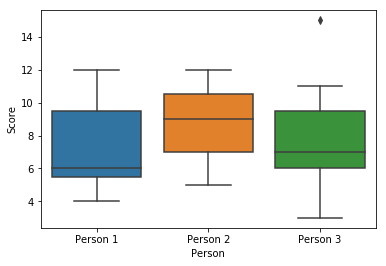

In [196]:
sns.boxplot(data = melted, x = "Person", y = "Score")

One can produce a “pivot” table based on column values. 

In [197]:
iris_pivot = iris_merged.pivot(columns = 'class')
iris_pivot.head()
#iris_pivot['sepal length (cm)','setosa']

sepal length (cm)                      sepal width (cm)             \
class            setosa versicolor virginica           setosa versicolor   
0                  10.2        NaN       NaN           3.5 cm        NaN   
1                   9.8        NaN       NaN           3.0 cm        NaN   
2                   9.4        NaN       NaN           3.2 cm        NaN   
3                   9.2        NaN       NaN           3.1 cm        NaN   
4                  10.0        NaN       NaN           3.6 cm        NaN   

                petal length (cm)                      petal width (cm)  \
class virginica            setosa versicolor virginica           setosa   
0           NaN               1.4        NaN       NaN              0.2   
1           NaN               1.4        NaN       NaN              0.2   
2           NaN               1.3        NaN       NaN              0.2   
3           NaN               1.5        NaN       NaN              0.2   
4           NaN               1.4        NaN       NaN              0.2   

                           condition                       
class versicolor virginica    setosa versicolor virginica  
0            NaN       NaN       1.4        NaN       NaN  
1            NaN       NaN       1.4        NaN       NaN  
2            NaN       NaN       NaN        NaN       NaN  
3            NaN       NaN       NaN        NaN       NaN  
4            NaN       NaN       1.4        NaN       NaN

We can go back to wide format from melted. In this case MultiIndex has been created

In [198]:
person_pivot = melted.pivot_table(columns = 'Person',index = 'weekday')
person_pivot

Score                  
Person    Person 1 Person 2 Person 3
weekday                             
Friday          11        8        7
Monday          12       10        8
Saturday         6        9       11
Sunday           4       12       15
Thursday         8        5        3
Tuesday          6        6        5
Wednesday        5       11        7

In [199]:
type(person_pivot.columns)

pandas.core.indexes.multi.MultiIndex

In [200]:
person_pivot.columns = person_pivot.columns.droplevel(level=0)
person_pivot.reset_index()

Person,weekday,Person 1,Person 2,Person 3
0,Friday,11,8,7
1,Monday,12,10,8
2,Saturday,6,9,11
3,Sunday,4,12,15
4,Thursday,8,5,3
5,Tuesday,6,6,5
6,Wednesday,5,11,7


## Direct access, iloc, values, iterrows (not recommended)

In my experience most of data analysis can be done with MAP,APPLY and GROUPBY. Although there are cases when one would like to directly access values in dataframe. 
In order to get list from dataframe one could use:

In [201]:
df1.values.tolist()

[['a', 'b', 55.0, nan, nan, Timestamp('2018-04-24 00:00:00')],
 ['a', 'b', 55.0, nan, nan, Timestamp('2018-04-24 04:00:00')],
 ['a', 'b', 55.0, nan, nan, Timestamp('2018-04-24 08:00:00')],
 ['a', 'b', 55.0, nan, nan, Timestamp('2018-04-24 12:00:00')],
 ['a', 'b', nan, 'C', 55.0, Timestamp('2018-04-24 16:00:00')],
 ['a', 'b', nan, 'C', 55.0, Timestamp('2018-04-24 20:00:00')],
 ['a', 'b', nan, 'C', 55.0, Timestamp('2018-04-25 00:00:00')]]

In [202]:
idx =df1.loc[df1['value3'].notnull()] # select by condition
idx

,value1,value2,value5,value3,value4,time
0,a,b,NaN,C,55.0,2018-04-24 16:00:00
1,a,b,NaN,C,55.0,2018-04-24 20:00:00
2,a,b,NaN,C,55.0,2018-04-25 00:00:00


In [203]:
df3 = df1[~df1['value3'].isin(['C']) ] # select by condition
df3

,value1,value2,value5,value3,value4,time
0,a,b,55.0,NaN,NaN,2018-04-24 00:00:00
1,a,b,55.0,NaN,NaN,2018-04-24 04:00:00
2,a,b,55.0,NaN,NaN,2018-04-24 08:00:00
3,a,b,55.0,NaN,NaN,2018-04-24 12:00:00


In [204]:
df1.iloc[:5] # select by row numbers

,value1,value2,value5,value3,value4,time
0,a,b,55.0,NaN,NaN,2018-04-24 00:00:00
1,a,b,55.0,NaN,NaN,2018-04-24 04:00:00
2,a,b,55.0,NaN,NaN,2018-04-24 08:00:00
3,a,b,55.0,NaN,NaN,2018-04-24 12:00:00
0,a,b,NaN,C,55.0,2018-04-24 16:00:00


In [205]:
for index,row in df1.iterrows(): # loop through
    print(row['value5'])

55.0
55.0
55.0
55.0
nan
nan
nan
